In [1]:
from deeppavlov.models.embedders.fasttext_embedder import FasttextEmbedder
from deeppavlov.models.embedders.tfidf_weighted_embedder import TfidfWeightedEmbedder

from deepPavlovEval import Evaluator
from models import TfidfEmbedder, ELMoEmbedder

[nltk_data] Downloading package punkt to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2018-11-13 13:34:13.973 DEBUG in 'matplotlib'['__init__'] at line 410: $HOME=/home/not_a_robot
2018-11-13 13:34:13.973 DEBUG in 'matplotlib'['__init__'] at line 410: matplotlib data path /home/not_a_robot/.local/lib/python3.6/site-packages/matplotlib/mpl-data
2018-11-13 13:34:13.976 DEBUG in 'matplotlib'['__init__'] at line 1157: loaded rc file /home/not_a_robot/.local/lib/python3.6/site-p

In [2]:
evaluator = Evaluator()

2018-11-13 13:34:15.910 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 97: Cannot find /home/not_a_robot/Documents/deepPavlovEval/data/Rusentiment/valid.csv file


In [3]:
fastText = FasttextEmbedder('/data/embeddings/wiki.ru.bin', mean=True)
evaluator.evaluate(fastText, model_name='fastText')
del fastText

2018-11-13 13:34:16.50 INFO in 'deeppavlov.models.embedders.fasttext_embedder'['fasttext_embedder'] at line 52: [loading fastText embeddings from `/data/embeddings/wiki.ru.bin`]
/home/not_a_robot/Documents/deepPavlovEval/deepPavlovEval/utils.py:124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
fastText = FasttextEmbedder('/data/embeddings/wiki.ru.bin', mean=False)
fastTextTfidf = TfidfWeightedEmbedder(embedder=fastText,
                                      counter_vocab_path='/data/vocabs/counts_wiki_lenta.txt',
                                      mean=True)
evaluator.evaluate(fastTextTfidf, model_name='fastTextTfidf')
del fastTextTfidf
del fastText

2018-11-13 13:35:03.203 INFO in 'deeppavlov.models.embedders.fasttext_embedder'['fasttext_embedder'] at line 52: [loading fastText embeddings from `/data/embeddings/wiki.ru.bin`]


In [5]:
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz",
                    mean=True)
evaluator.evaluate(elmo, model_name='ELMo')
del elmo

Using TensorFlow backend.
2018-11-13 13:35:54.844 INFO in 'tensorflow'['tf_logging'] at line 159: Using /tmp/tfhub_modules to cache modules.
2018-11-13 13:35:56.121 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/aggregation/elmo_output_ELMo_W:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables' with aggregation/elmo_output_ELMo_W
2018-11-13 13:35:56.124 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/aggregation/elmo_output_ELMo_gamma:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables' with aggregation/elmo_output_ELMo_gamma
2018-11-13 13:35:56.127 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables' with bilm/CNN/W_cnn_0
2018-11-13 13:35:56.129 DEBUG in 'tensorflow'['tf_logging'] at line 100: In

In [6]:
%%time
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz",
                    mean=False)
elmo_tfidf = TfidfWeightedEmbedder(embedder=elmo,
                                   counter_vocab_path='/data/vocabs/counts_wiki_lenta.txt',
                                   mean=True)
evaluator.evaluate(elmo_tfidf, model_name='ELMoTfidf')
del elmo
del elmo_tfidf

2018-11-13 13:40:57.942 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/aggregation/elmo_output_ELMo_W:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables' with aggregation/elmo_output_ELMo_W
2018-11-13 13:40:57.945 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/aggregation/elmo_output_ELMo_gamma:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables' with aggregation/elmo_output_ELMo_gamma
2018-11-13 13:40:57.947 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables' with bilm/CNN/W_cnn_0
2018-11-13 13:40:57.950 DEBUG in 'tensorflow'['tf_logging'] at line 100: Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'/tmp/tfhub_modules/87bb96abc151e6cd3f78c57db420c8d58ca4969d/variables/variables

CPU times: user 59min 22s, sys: 9min 1s, total: 1h 8min 23s
Wall time: 36min 28s


In [8]:
evaluator.save_results('results.jsonl')

2018-11-13 14:31:04.660 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1343: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/not_a_robot/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000
2018-11-13 14:31:04.671 DEBUG in 'matplotlib.font_manager'['font_manager'] at line 1343: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/not_a_robot/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 2.050000


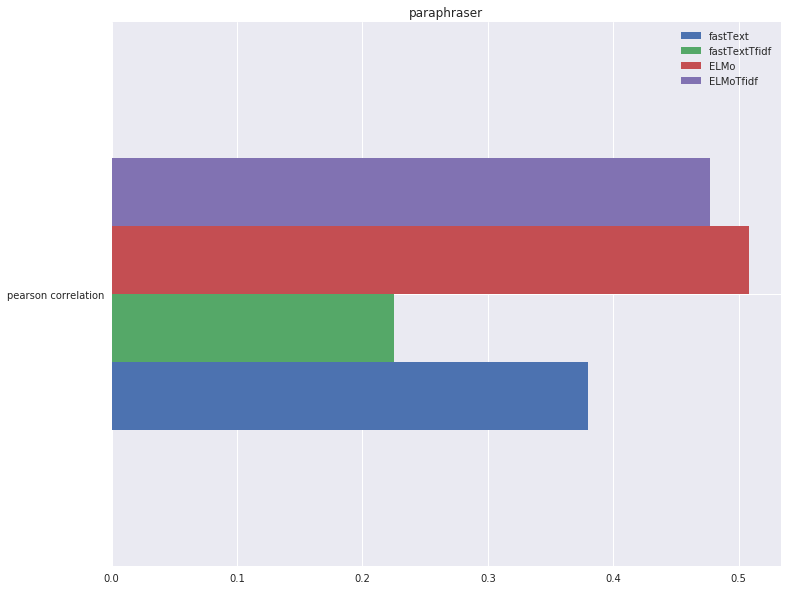

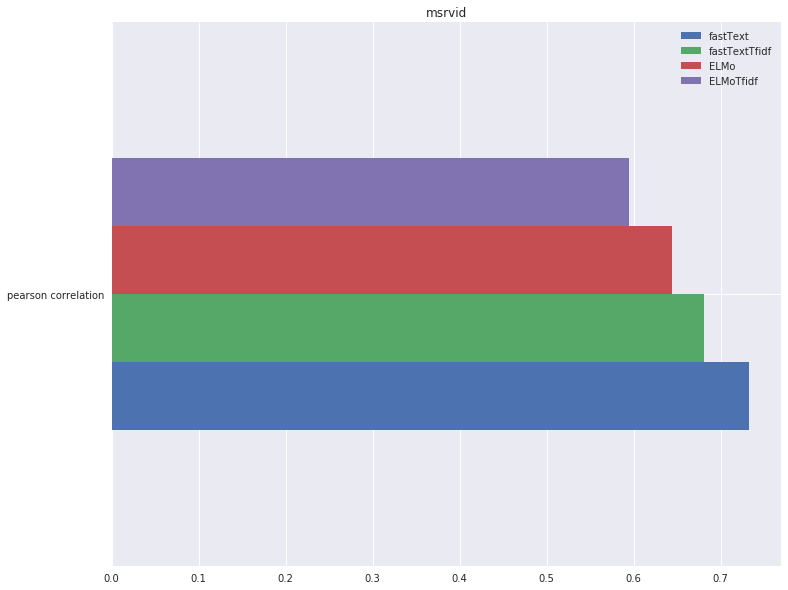

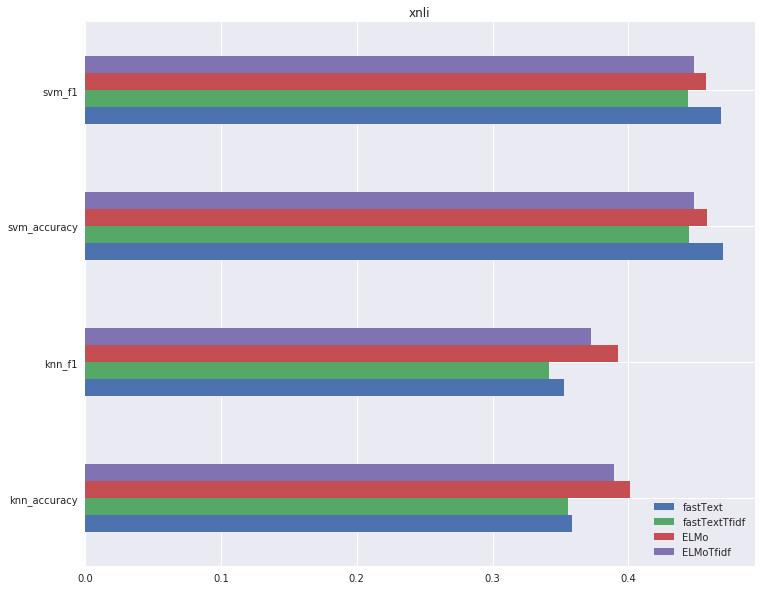

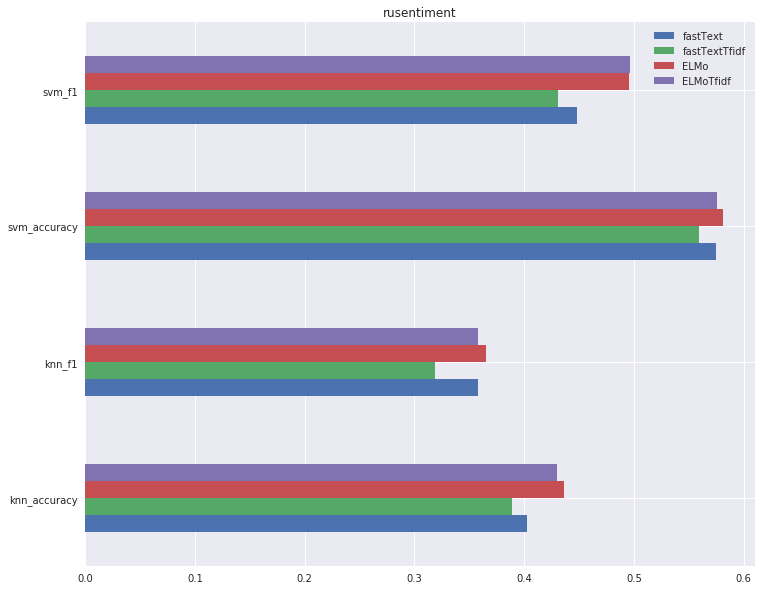

In [9]:
evaluator.plot_results(save=True, show=True)